<a href="https://colab.research.google.com/github/kmalicekim/NLP_practice_mine/blob/master/4.%EC%B9%B4%EC%9A%B4%ED%8A%B8%20%EA%B8%B0%EB%B0%98%EC%9D%98%20%EB%AC%B8%EC%84%9C%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.2 BOW 기반의 카운트 벡터 생성

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import movie_reviews

print('#review count:', movie_reviews.fileids())   # 영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10])
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍/부정에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) # label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) # label이 긍정 문서들 id 반환

fileid = movie_reviews.fileids()[0] # 첫번째 문서의 id 반환
print('#id of the first review:', fileid)
print('#first review content:\n', movie_reviews.raw(fileid)[:200]) # 첫번째 문서의 내용을 200자까지만 출력
print()

print('#sentence tokenization result:', movie_reviews.sents(fileid)[:3]) # 첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print('#word tokenization result:', movie_reviews.words(fileid)[:20]) # 첫번째 문서를 word tokenize한 결과 중 앞 20개 단어


#review count: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt', 'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt', 'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt', 'neg/cv018_21672.txt', 'neg/cv019_16117.txt', 'neg/cv020_9234.txt', 'neg/cv021_17313.txt', 'neg/cv022_14227.txt', 'neg/cv023_13847.txt', 'neg/cv024_7033.txt', 'neg/cv025_29825.txt', 'neg/cv026_29229.txt', 'neg/cv027_26270.txt', 'neg/cv028_26964.txt', 'neg/cv029_19943.txt', 'neg/cv030_22893.txt', 'neg/cv031_19540.txt', 'neg/cv032_23718.txt', 'neg/cv033_25680.txt', 'neg/cv034_29446.txt', 'neg/cv035_3343.txt', 'neg/cv036_18385.txt', 'neg/cv037_19798.txt', 'neg/cv038_9781.txt', 'neg/cv039_5963.txt', 'neg/cv040_8829.txt', 'neg/cv041_22364.txt', 'neg/cv042_11927.txt', 'ne

In [ ]:
documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
print(documents[0][:50])  # 첫번째 문서의 앞 50개 단어 출력

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [ ]:
word_count = {}

for text in documents:
  for word in text:
    word_count[word] = word_count.get(word, 0)+1


print(word_count)
print(list(word_count))  # dictionary를 list화 시키면 key 부분만 담기고
print(dict(list(word_count.items())[:2]))   # list화 시킬 때 items()를 뒤에 붙이고 list화 시키면 key와 value값 둘 다 담김


sorted_features = sorted(word_count, key=word_count.get, reverse=True)
for word in sorted_features:
  print(f'count of {word}: {word_count[word]}', end=', ')


{'plot': 1513, ':': 3042, 'two': 1911, 'teen': 151, 'couples': 27, 'go': 1113, 'to': 31937, 'a': 38106, 'church': 69, 'party': 183, ',': 77717, 'drink': 32, 'and': 35576, 'then': 1424, 'drive': 105, '.': 65876, 'they': 4825, 'get': 1949, 'into': 2623, 'an': 5744, 'accident': 104, 'one': 5852, 'of': 34123, 'the': 76529, 'guys': 268, 'dies': 104, 'but': 8634, 'his': 9587, 'girlfriend': 218, 'continues': 88, 'see': 1749, 'him': 2633, 'in': 21822, 'her': 4522, 'life': 1586, 'has': 4719, 'nightmares': 26, 'what': 3322, "'": 30585, 's': 18513, 'deal': 219, '?': 3771, 'watch': 603, 'movie': 5771, '"': 17612, 'sorta': 10, 'find': 782, 'out': 3637, 'critique': 61, 'mind': 451, '-': 15595, 'fuck': 17, 'for': 9961, 'generation': 96, 'that': 15924, 'touches': 55, 'on': 7385, 'very': 1863, 'cool': 208, 'idea': 386, 'presents': 78, 'it': 16107, 'bad': 1395, 'package': 30, 'which': 3161, 'is': 25195, 'makes': 992, 'this': 9578, 'review': 295, 'even': 2565, 'harder': 33, 'write': 119, 'since': 768, 'i

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 

tokenizer = RegexpTokenizer('[\w]{3,}') # 정규표현식으로 tokenizer정의
english_stops = set(stopwords.words("english")) # 영어 불용어를 가져옴

# words() 대신 raw()를 이용해 원문을 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# stopwords의 적용과 토큰화를 동시에 수행
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]

word_count = {}
for text in tokens:
  for word in text:
    word_count[word] = word_count.get(word, 0)+1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('#num of features:', len(sorted_features))
for word in sorted_features[:10]:
  print(f'count of {word}: {word_count[word]}', end=', ')



#num of features: 39208
count of film: 9517, count of one: 5852, count of movie: 5771, count of like: 3690, count of even: 2565, count of good: 2411, count of time: 2411, count of story: 2169, count of would: 2109, count of much: 2049, 

In [ ]:
# 빈도가 높은 상위 1000개의 단어만 추출하여 features 구성

word_features = sorted_features[:1000]

In [ ]:
# 함수 생성

def document_features(document, word_features):
  word_count = {}

  # document에 있는 단어들에 대해 빈도수를 먼저 계산
  for x in document: 
    word_count[x] = word_count.get(x, 0)+1

  # word_features 의 단어에 대해 계산된 빈도수를 feature에 추가
  features = []
  for y in word_features:
    features.append(word_count.get(y,0)) # 빈도가 없는 단어는 0으로 입력
  
  return features

## 교재에서는 x,y 를 word라고 썼으나, 이해를 돕기위해 다른 변수를 작성함
## document : 워드카운트로 세고 싶은 데이터
## word_features : 전체 단어장


# 예시로 해당 함수가 잘 작동하는지 알아보기
word_features_ex = ['one', 'two', 'teen', 'couples', 'solo']
doc_ex = ['two', 'two', 'couples']
print(document_features(doc_ex, word_features_ex))

[0, 2, 0, 1, 0]


In [ ]:
# document_features 함수 사용
feature_sets = [document_features(d, word_features) for d in tokens]
print(feature_sets[:10])

# 첫째 feature set의 내용을 앞 20개만 word_features의 단어와 함께 출력
for i in range(20):
  print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

[[6, 3, 6, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 1, 1, 0, 2, 3, 5, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

---

## 4.3 Scikit-learn을 이용한 카운트 벡터 생성

> ### **sklearn.feature_extraction 모듈**
>
>*   텍스트나 이미지로부터 특성을 추출하는 도구
>*   CountVectorizer 클래스 : 카운트 기반의 벡터를 만드는 가장 기본적인 도구

### &nbsp;

> ### **BOW 기반의 특성 벡터 추출과정**
>
>
> 1. 전처리
> 2. 특성 집합 &rightarrow; fit() 메서드가 수행
> <br> <br> ㄴ 토큰화, 불용어 제거, 특성 선택 후 특성 집합 생성
> 
> 3. 벡터 생성 &rightarrow; transform() 메서드가 수행
> <br> <br> ㄴ 특성 집합을 이용해 각 문서로부터 특성 벡터 혹은 카운트 벡터 생성
>

In [ ]:
# data 준비, movie_reviews.raw()를 사용하여 raw text 추출
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [ ]:
# 순서 : 1.전처리 > 2.특성 집합 > 3.벡터 생성

from sklearn.feature_extraction.text import CountVectorizer

# cv = Countvectorizer() # 모든 매개변수에 디폴트 값을 사용하는 경우

# 앞에서 생성한 word_features를 이용하여 특성 집합을 지정하는 경우 --- CountVectorizer의 vocabulary를 사용
cv = CountVectorizer(vocabulary=word_features)  # word_features 는 빈도 상위 1000개만 특성 집합으로 선정한 것

# cv = CountVectorizer(max_features = 1000) # 특성 집합을 지정하지 않고 최대 특성의 수를 지정하는 경우
print(cv)

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'good',
                            'time', 'story', 'would', 'much', 'character',
                            'also', 'get', 'two', 'well', 'characters', 'first',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'scene', 'man',
                            'bad', ...])


In [ ]:
reviews_cv = cv.fit_transform(reviews) # reviews를 이용하여 count vector를 학습하고 변환함
print(cv.get_feature_names_out()[:20]) # count vector에 사용된 feature 이름을 20개 반환
print(word_features[:20]) # 비교를 위해 출력 --- 당연 똑같음


['film' 'one' 'movie' 'like' 'even' 'good' 'time' 'story' 'would' 'much'
 'character' 'also' 'get' 'two' 'well' 'characters' 'first' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story', 'would', 'much', 'character', 'also', 'get', 'two', 'well', 'characters', 'first', 'see', 'way', 'make']


In [ ]:
print('#type of count vectors:', type(reviews_cv))
print('#shape of count vectors:', reviews_cv.shape)
print('#sample of count vector:')
print(reviews_cv[0, :10]) # 다차원 -- 0번째 행, 제일 첫 열에서 10번째 열까지 

#type of count vectors: <class 'scipy.sparse.csr.csr_matrix'>
#shape of count vectors: (2000, 1000)
#sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 5)	2
  (0, 8)	1


In [ ]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 254135 stored elements in Compressed Sparse Row format>

In [ ]:
# 특성 집합
cv.get_feature_names_out()

array(['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story',
       'would', 'much', 'character', 'also', 'get', 'two', 'well',
       'characters', 'first', 'see', 'way', 'make', 'life', 'really',
       'films', 'plot', 'little', 'people', 'could', 'scene', 'man',
       'bad', 'never', 'best', 'new', 'scenes', 'many', 'director',
       'know', 'movies', 'action', 'great', 'another', 'love', 'made',
       'big', 'end', 'something', 'back', 'still', 'world', 'seems',
       'work', 'makes', 'however', 'every', 'though', 'better', 'real',
       'audience', 'enough', 'seen', 'take', 'around', 'going', 'year',
       'performance', 'role', 'old', 'gets', 'may', 'things', 'think',
       'years', 'last', 'comedy', 'funny', 'actually', 'long', 'look',
       'almost', 'thing', 'fact', 'nothing', 'say', 'right', 'john',
       'although', 'played', 'find', 'script', 'come', 'ever', 'cast',
       'since', 'star', 'plays', 'young', 'show', 'comes', 'part',
       'original', 'a

In [ ]:
# 특성 벡터
reviews_cv.toarray()

array([[ 6,  3,  6, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       [ 8,  5,  2, ...,  0,  0,  0],
       ...,
       [ 8,  5,  5, ...,  0,  0,  1],
       [15,  4,  3, ...,  0,  0,  0],
       [ 9,  5,  8, ...,  0,  0,  0]])

In [ ]:
print(feature_sets[0][:20])  # 절 앞에서 직접 계산한 카운트 벡터
print(reviews_cv.toarray()[0, :20]) # 변환된 결과의 첫째 feature set 중에서 앞 20개 출력

[6, 3, 6, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 1, 1, 0, 2, 3, 5]
[6 3 6 3 3 2 0 0 1 0 2 1 3 2 1 1 0 2 3 5]


In [ ]:
for word,count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
  print(f'{word}:{count}', end=', ')

film:6, one:3, movie:6, like:3, even:3, good:2, time:0, story:0, would:1, much:0, character:2, also:1, get:3, two:2, well:1, characters:1, first:0, see:2, way:3, make:5, 

In [ ]:
for x, y in zip(cv.get_feature_names_out()[:20], reviews_cv[0, :20]):
  print(f'{x}:{y}', end=', ')

film:  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 5)	2
  (0, 8)	1
  (0, 10)	2
  (0, 11)	1
  (0, 12)	3
  (0, 13)	2
  (0, 14)	1
  (0, 15)	1
  (0, 17)	2
  (0, 18)	3
  (0, 19)	5, 

In [ ]:
print(cv.get_feature_names_out()[:20])

['film' 'one' 'movie' 'like' 'even' 'good' 'time' 'story' 'would' 'much'
 'character' 'also' 'get' 'two' 'well' 'characters' 'first' 'see' 'way'
 'make']


In [ ]:
print(reviews_cv[0,:20])

  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 5)	2
  (0, 8)	1
  (0, 10)	2
  (0, 11)	1
  (0, 12)	3
  (0, 13)	2
  (0, 14)	1
  (0, 15)	1
  (0, 17)	2
  (0, 18)	3
  (0, 19)	5


## 4.4 한국어 텍스트의 카운트 벡터 변환

In [ ]:
import pandas as pd
df = pd.read_csv('/daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features=1000)

daum_DTM = daum_cv.fit_transform(df.review) # review를 이용하여 count vector를 학습하고 변환
print(daum_cv.get_feature_names_out()[:100]) # count vector 에 사용된 feature 이름 반환

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


In [ ]:
!pip install konlpy
from konlpy.tag import Okt # konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print('#전체 형태소 결과:', twitter_tag.morphs(df.review[1]))
print('#명사만 추출:', twitter_tag.nouns(df.review[1]))
print('#품사 태깅 결과:', twitter_tag.pos(df.review[1]))

#전체 형태소 결과: ['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
#명사만 추출: ['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']
#품사 태깅 결과: [('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [ ]:
def my_tokenizer(doc):
  return [token for token, pos in twitter_tag.pos(doc) if pos in ['Noun', 'Verb', 'Adjective']]

print('나만의 토크나이저 결과:', my_tokenizer(df.review[1]))

나만의 토크나이저 결과: ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 토크나이저와 특성의 최대개수를 지정
daum_cv = CountVectorizer(max_features=1000, tokenizer=my_tokenizer)
# 명사만 추출하고 싶은 경우에는 tokenizer에 twitter_tag.noun 을 바로 지정해도 됨

daum_DTM = daum_cv.fit_transform(df.review)
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름 반환


['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지' '가치' '각색' '간' '간다'
 '간만' '갈' '갈수록' '감' '감독' '감동' '감사' '감사합니다' '감상' '감성' '감정' '감탄' '갑자기' '갔는데'
 '갔다' '갔다가' '강' '강철' '강추' '같고' '같네요' '같다' '같습니다' '같아' '같아요' '같은' '같은데'
 '같음' '개' '개그' '개봉' '개연' '개인' '거' '거기' '거리' '거의' '걱정' '건' '건가' '건지' '걸'
 '겁니다' '것' '게' '겨울왕국' '결론' '결말' '경찰' '경험' '계속' '고' '고맙습니다' '고민' '고생' '곤지암'
 '곳' '공감' '공포' '공포영화' '과' '과거' '관' '관객' '관객수' '관람' '광주' '괜찮은' '교훈' '구성'
 '국내' '국민' '군인' '군함도' '굿' '권선' '귀신' '그' '그것' '그게' '그날' '그냥' '그닥' '그대로'
 '그때' '그래픽']


In [ ]:
print(repr(daum_DTM)) #repr() : str() 와 비슷함
print(110800/(14725*1000))


<14725x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 110800 stored elements in Compressed Sparse Row format>
0.007524617996604414


In [ ]:
for word, count in zip(daum_cv.get_feature_names_out(), daum_DTM[1].toarray()[0]):
  if count>0:
    print(word, ':', count, end=', ')

내 : 1, 듯 : 1, 몰입 : 1, 생각 : 1, 손 : 1, 없다 : 1, 할 : 1, 

## 4.5 카운트 벡터의 활용

## 코사인 유사도(Cosine similarity)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]



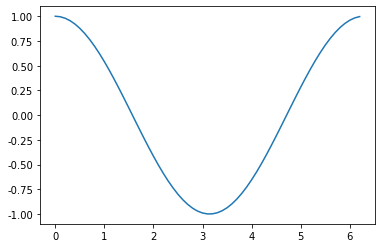

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
x = np.arange(0, 2*np.pi, 0.1) #start, stop,step
y = np.cos(x)

print(x)
print()

plt.plot(x,y)
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

start = len(reviews[0])//2 #첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
source = reviews[0][-start:] #중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성

source_cv = cv.transform([source]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

print('#대상 특성 행렬의 크기:', source_cv.shape) #행렬의 크기를 확인, 문서가 하나이므로 (1,1000)

sim_result = cosine_similarity(source_cv, reviews_cv) #변환된 count vector와 기존 값들과의 similarity 계산

print('#유사도 계산 행렬의 크기:', sim_result.shape)
print('#유사도 계산결과를 역순으로 정렬:', sorted(sim_result[0], reverse=True)[:10])

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 2000)
#유사도 계산결과를 역순으로 정렬: [0.8367205630128807, 0.43784070017231075, 0.4080451370075411, 0.4063802391472214, 0.4060219836225451, 0.39965783997760135, 0.3994228018440035, 0.39566661804603703, 0.3938902773761537, 0.3911637170821695]


## 4.6 TF-IDF로 성능 높이기

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)
print('#shape of tfidf matrix:', reviews_tfidf.shape) # TF-IDF 행렬의 모양과 카운트 행렬의 모양이 일치하는 것을 확인

# 첫 리뷰의 카운트 벡터 중 앞 20개 값 출력
print('#20 count score of the first review:', reviews_cv[0].toarray()[0,:20])

# 첫 리뷰의 TF-IDF 벡터 중 앞 20개 값 출력
print('#20 tfidf score of the first review:', reviews_tfidf[0].toarray()[0,:20])

print()
print(reviews_tfidf.toarray()[0,:20])


#shape of tfidf matrix: (2000, 1000)
#20 count score of the first review: [6 3 6 3 3 2 0 0 1 0 2 1 3 2 1 1 0 2 3 5]
#20 tfidf score of the first review: [0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.0609124
 0.         0.         0.03126552 0.         0.06575035 0.03242315
 0.09567082 0.06518293 0.03225625 0.0345017  0.         0.06863314
 0.10042383 0.16727495]

[0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.0609124
 0.         0.         0.03126552 0.         0.06575035 0.03242315
 0.09567082 0.06518293 0.03225625 0.0345017  0.         0.06863314
 0.10042383 0.16727495]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(word_features[:10])
tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf = tf.fit_transform(reviews)

source_tf = tf.transform([source]) # 코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
# transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

sim_result_tf = cosine_similarity(source_tf, reviews_tf) # 변환된 count vector와 기존 값들과의 similarity 계산

print(sim_result_tf.shape)
print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf[0])) #np.argmax: 가장 큰 원소의 '인덱스'를 반환

# 가장 유사한 리뷰의 인덱스가 0인건 당연하겠지 --- source가 가장 첫번째 리뷰에서 중심점으로부터 뒤 절반이니깐

['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story', 'would', 'much']
(1, 2000)
#가장 유사한 리뷰의 인덱스: 0


In [ ]:
print('#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10]) #numpy argsort는 default가 오름차순
print('#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf[0]).argsort()[:10])

#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628 1712  112 1393  524 1740]
#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1393 1570  645  323 1143  628 1676 1391]
